<a href="https://colab.research.google.com/github/mondalsnehankur/Statistical-Distribution-Python/blob/main/2_D_Random_Walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Code : 18***

***Date : 13/10/2023***

# ***2-D Random Walk.***

*Random Average Mean walk for sample size of 1000.*

In [ ]:
from random import choice
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
def pwr(x,a,b):
  return a*x**b

def walk(steps):
  x,y = 0.0,0.0
  position = []
  for i in range(steps):
    dx,dy = choice([(1,0),(-1,0),(0,1),(0,-1)])
    x,y = x+dx,y+dy
    position.append(np.sqrt(x**2 + y**2))
  return position

In [ ]:
steps,config = 1000,1000
walks = np.array([walk(steps) for i in range(config)])
c_walk = np.cumsum(walks,axis=1)
mean_walk = np.mean(c_walk,axis=0)

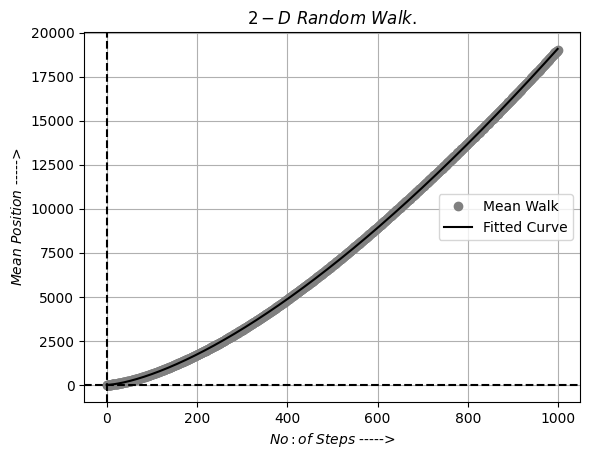

In [ ]:
t = range(steps)

plt.plot(t,mean_walk,'o',color='grey',label='Mean Walk')

par,var = curve_fit(pwr,t,mean_walk)
plt.plot(t,pwr(t,par[0],par[1]),color='black',label='Fitted Curve')

plt.legend(loc='best')
plt.title('$2-D$ $Random$ $Walk$.')
plt.grid()
plt.xlabel('$No:of$ $Steps$ ----->')
plt.ylabel('$Mean$ $Position$ ----->')
plt.axhline(0,linestyle='--',color='black')
plt.axvline(0,linestyle='--',color='black')

plt.show()

In [ ]:
print('Power Fit : y(t) = A*t^B :','\n')
print("A = %f +/- %f . "%(par[0],np.sqrt(var[0,0])))
print("B = %f +/- %f . "%(par[1],np.sqrt(var[1,1])))

Power Fit : y(t) = A*t^B : 

A = 0.638796 +/- 0.001736 . 
B = 1.491890 +/- 0.000408 . 


Log Fit.

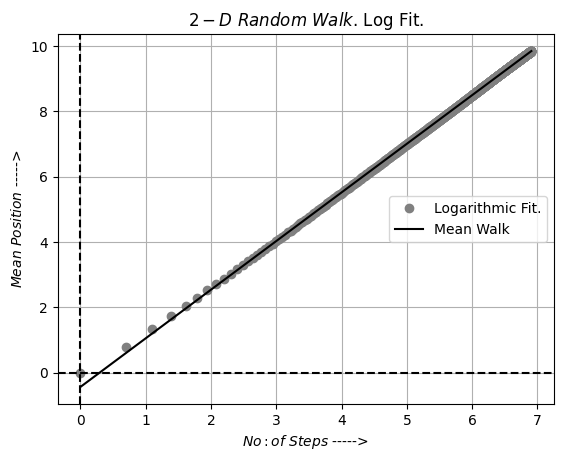

In [ ]:
t = np.log(range(1,steps+1))
r = np.log(mean_walk)

plt.plot(t,r,'o',color='grey',label='Logarithmic Fit.')

import numpy.polynomial.polynomial as poly

coeffs = poly.polyfit(t,r,1)
rfit = poly.polyval(t,coeffs)

plt.plot(t,rfit,color='black',label='Mean Walk')

plt.legend(loc='best')
plt.title('$2-D$ $Random$ $Walk$. Log Fit.')
plt.grid()
plt.xlabel('$No:of$ $Steps$ ----->')
plt.ylabel('$Mean$ $Position$ ----->')
plt.axhline(0,linestyle='--',color='black')
plt.axvline(0,linestyle='--',color='black')
plt.show()

In [ ]:
print(coeffs)

[-0.43926563  1.48934481]
